In [5]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import struct

import cartopy
from cartopy import crs as ccrs
import matplotlib 
from matplotlib import pyplot as plt
import os
from os.path import join, exists
from os import mkdir
import scipy
import netCDF4
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)
import pandas as pd
import matplotlib.path as mpath
from matplotlib.colors import TwoSlopeNorm 

time_scale=86400/2/np.pi
length_scale=6370*1000
PSI_scale=length_scale**2/time_scale

with open("/scratch/hz1994/blocking/data_MMmodel/filepath.txt","r") as fi:
    for ln in fi:
        if ln.startswith("dimensionalized_filepath"):
            dim_path=ln.strip().split('\t')[1]
        if ln.startswith("TMindex_filepath"):
            TMindex_path=ln.strip().split('\t')[1]  
        if ln.startswith("nondimensionalized_filepath"):
            nondim_path=ln.strip().split('\t')[1]
        if ln.startswith("DGindex_filepath"):
            DGindex_path=ln.strip().split('\t')[1]  
        if ln.startswith("fig_filepath" ):
            fig_path=ln.strip().split('\t')[1]  
print(dim_path)
print(nondim_path)
print(TMindex_path)
print(DGindex_path)
print(fig_path)
blocking_composite=xr.open_dataarray(fig_path+"blocking_composite_MM.nc")
non_blocking_composite=xr.open_dataarray(fig_path+"non_blocking_composite.nc")
latitudes=xr.open_dataarray(fig_path+"latitudes.nc")
longitudes=xr.open_dataarray(fig_path+"longitudes.nc")

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

/scratch/hz1994/blocking/data_MMmodel/dim/
/scratch/hz1994/blocking/data_MMmodel/nondim/
/scratch/hz1994/blocking/data_MMmodel/TMindex/
/scratch/hz1994/blocking/data_MMmodel/DGindex/
/scratch/hz1994/blocking/data_MMmodel/fig_MMmodel/


[<xarray.DataArray 'latitude' ()>
array(59.99427)
Coordinates:
    latitude  float64 59.99
    level     int32 ...
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y, <xarray.DataArray 'latitude' ()>
array(63.864226)
Coordinates:
    latitude  float64 63.86
    level     int32 ...
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y]


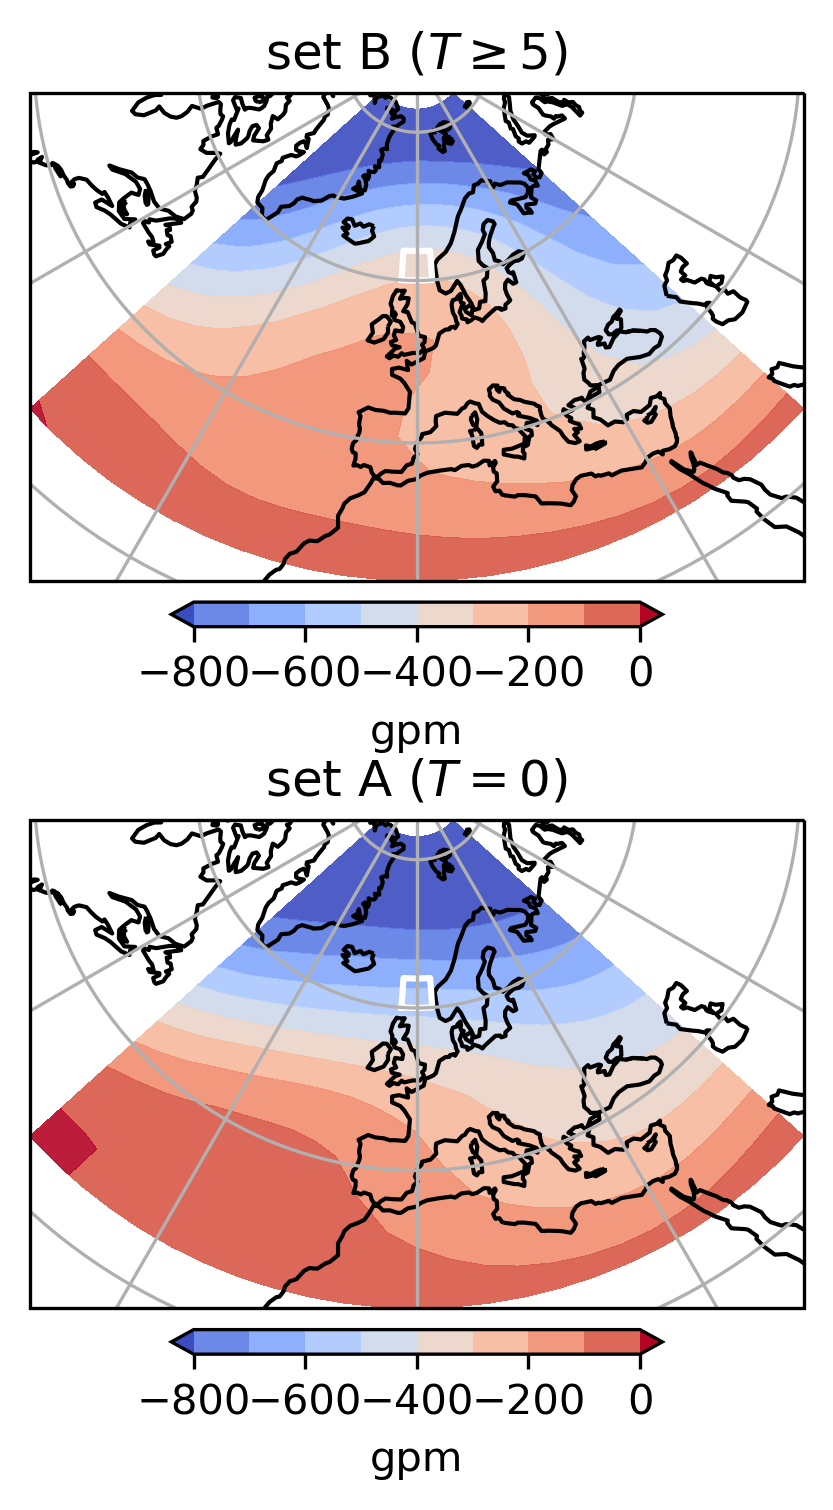

In [7]:

def plotpolarview(ax,quantity,title,levels,label,ticks,format_=None): #plot the frenquency of the quantity. The quantity can be LSB, blockings, etc
    im=xr.plot.contourf( 
        (quantity),
        x="longitude", y="latitude", ax=ax,transform=ccrs.PlateCarree(),cmap='coolwarm',\
        levels=levels,ticks=ticks,alpha=0.9,
                cbar_kwargs={
                'label': label, "orientation":"horizontal","shrink":1,"fraction":0.046,"pad":0.04,
                    "ticks":ticks,"format":format_,
            }
    )
    ax.set_title(title)
    ax.coastlines()
    gl=ax.gridlines(draw_labels=False)
    gl.ylocator = mticker.FixedLocator([20,40,60,80])  
    
fig,ax=plt.subplots(figsize=[3,5],nrows=2, subplot_kw={'projection': ccrs.NorthPolarStereo()})
plotpolarview(ax[0],blocking_composite.sel(latitude=slice(25,85),longitude=slice(-50,50)) ,r'set B ($T\geq 5$)',\
              np.arange(-800,100,100), "gpm",np.arange(-800,200,200))
plotpolarview(ax[1],non_blocking_composite.sel(latitude=slice(25,85),longitude=slice(-50,50)) ,r'set A ($T=0$)', \
              np.arange(-800,100,100),"gpm",np.arange(-800,200,200))

lat_atl=[latitudes[10] ,latitudes[11] ]
lon_atl=[longitudes[44],longitudes[45],longitudes[46] ]
print(lat_atl)
line_lat=[lat_atl[0],lat_atl[0],lat_atl[0],lat_atl[1],lat_atl[1],lat_atl[1],lat_atl[0]]
line_lon=[lon_atl[0],lon_atl[1],lon_atl[2],lon_atl[2],lon_atl[1],lon_atl[0],lon_atl[0]]

ax[0].plot(line_lon, line_lat,'w-',alpha = 1,transform=ccrs.PlateCarree(), label='atl')
ax[1].plot(line_lon, line_lat,'w-',alpha = 1,transform=ccrs.PlateCarree(), label='atl')
fig.tight_layout()
fig.savefig("blocking_composite_region.png")

# DG index for different M and T

In [3]:
def plotpolarview(ax,quantity,levels,ticks,label,format_=None): #plot the frenquency of the quantity. The quantity can be LSB, blockings, etc
    im=xr.plot.contourf( 
        (quantity),
        x="longitude", y="latitude", ax=ax,transform=ccrs.PlateCarree(),cmap='coolwarm',\
        levels=levels,ticks=ticks,alpha=0.9,
                cbar_kwargs={
                'label': label, "orientation":"horizontal","shrink":1,"fraction":0.046,"pad":0.04,
                    "ticks":ticks,"format":format_
            }
    )

    ax.coastlines()
    ax.set_title("")
    gl=ax.gridlines(draw_labels=True)
    gl.ylocator = mticker.FixedLocator([20,40,60,80])      
    gl.xlocator = mticker.FixedLocator([0,180])

/scratch/hz1994/blocking/data_MMmodel/fig_MMmodel/


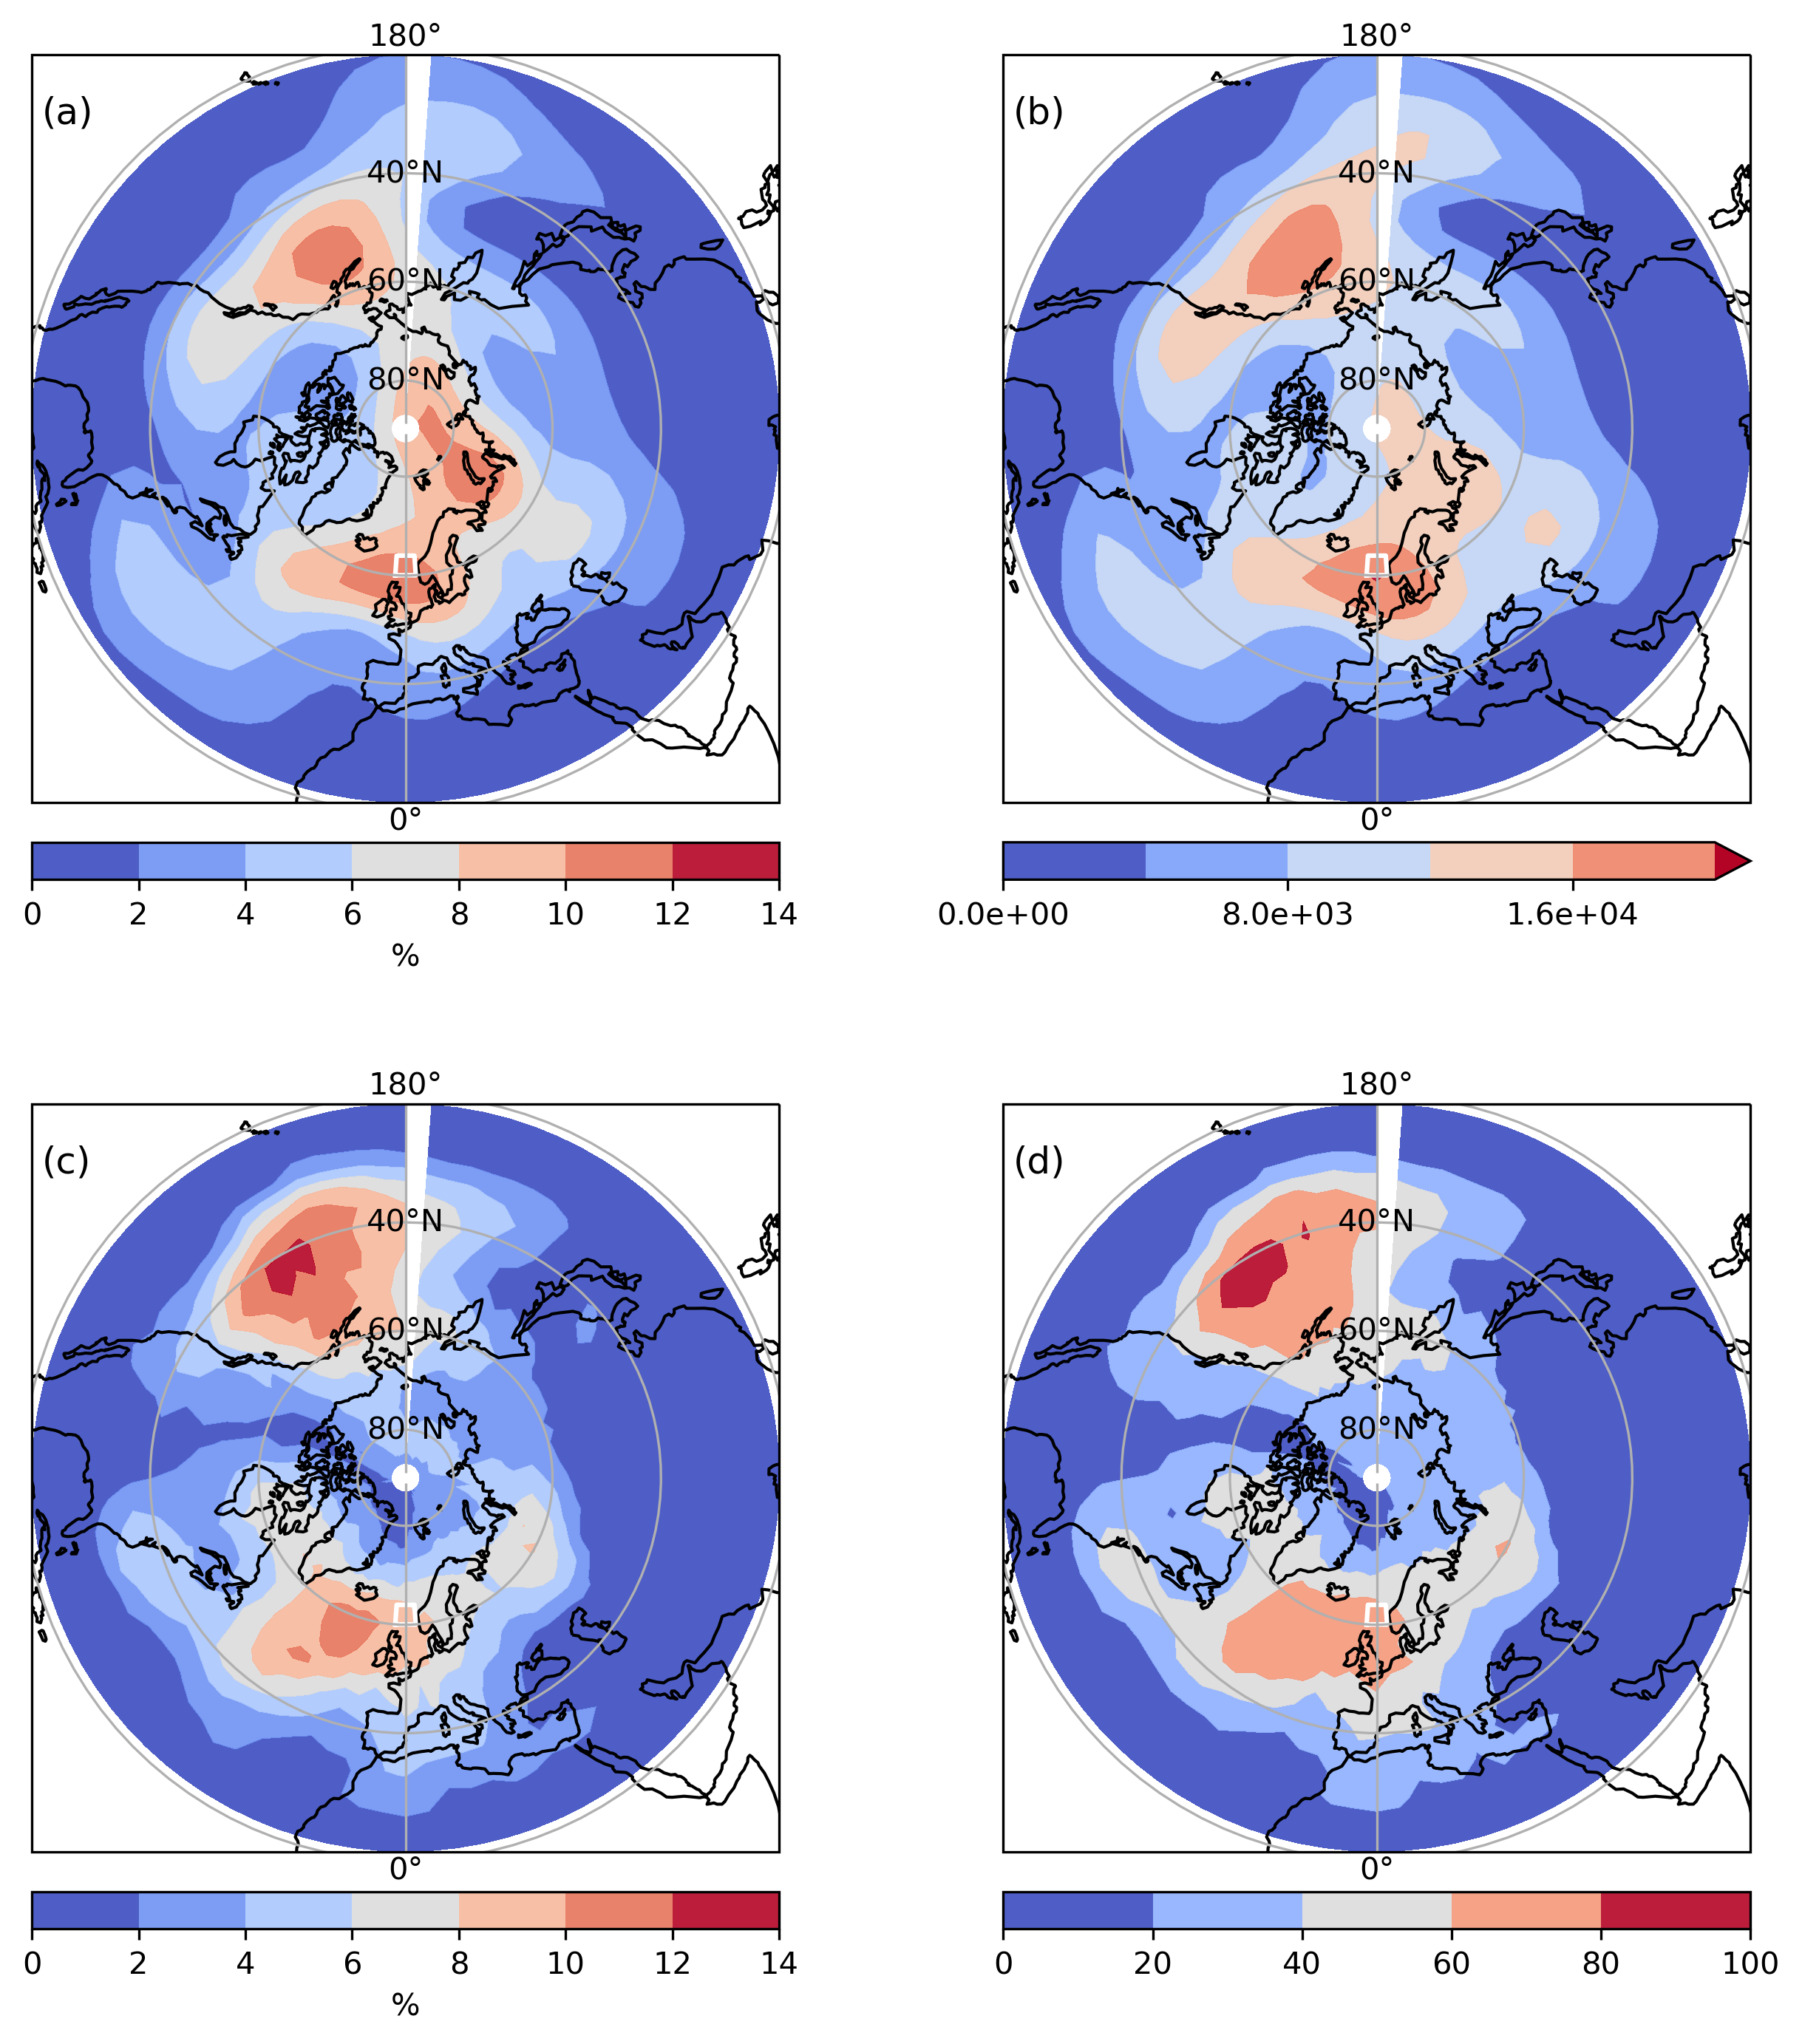

In [6]:
print(fig_path)
num_MM=xr.open_dataarray(fig_path+"num_blocking_MM.nc")
percent_MM=xr.open_dataarray(fig_path+"percent_blocking_MM.nc")
num_era5=xr.open_dataarray(fig_path+"num_blocking_era5.nc")
percent_era5=xr.open_dataarray(fig_path+"percent_blocking_era5.nc") 

fig,ax=plt.subplots(figsize=[10,12],ncols=2,nrows=2,subplot_kw={'projection': ccrs.NorthPolarStereo()})
plotpolarview(ax[0,0],percent_MM , np.arange(0,16,2),np.arange(0,16,2),'%')
plotpolarview(ax[0,1],num_MM , np.arange(0,24000,4000),  np.arange(0,24000,8000),'', format_='%.1e')
plotpolarview(ax[1,0],percent_era5 , np.arange(0,16,2),np.arange(0,16,2),'%')
plotpolarview(ax[1,1],num_era5 , np.arange(0,120,20 ),np.arange(0,120,20 ),'')

lon_atl=[]
lat_atl=[]
lat_atl=[latitudes[10],latitudes[10],latitudes[11],latitudes[11],latitudes[10]]
lon_atl=[longitudes[44],longitudes[46],longitudes[46],longitudes[44],longitudes[44]]

ax=ax.flatten()
labels=["(a)","(b)","(c)","(d)"]
for l,a in zip(labels,ax):
    a.text(-130,8, l, transform=ccrs.PlateCarree(),fontsize="large")
    a.plot(lon_atl, lat_atl,'w',linestyle='-',alpha = 1,transform=ccrs.PlateCarree(), label='atl')
plt.subplots_adjust(hspace=0.05,wspace=0.3) 
fig.savefig("Fig1_blocking_statistics.png", bbox_inches='tight')

# Mean and Variance statistics

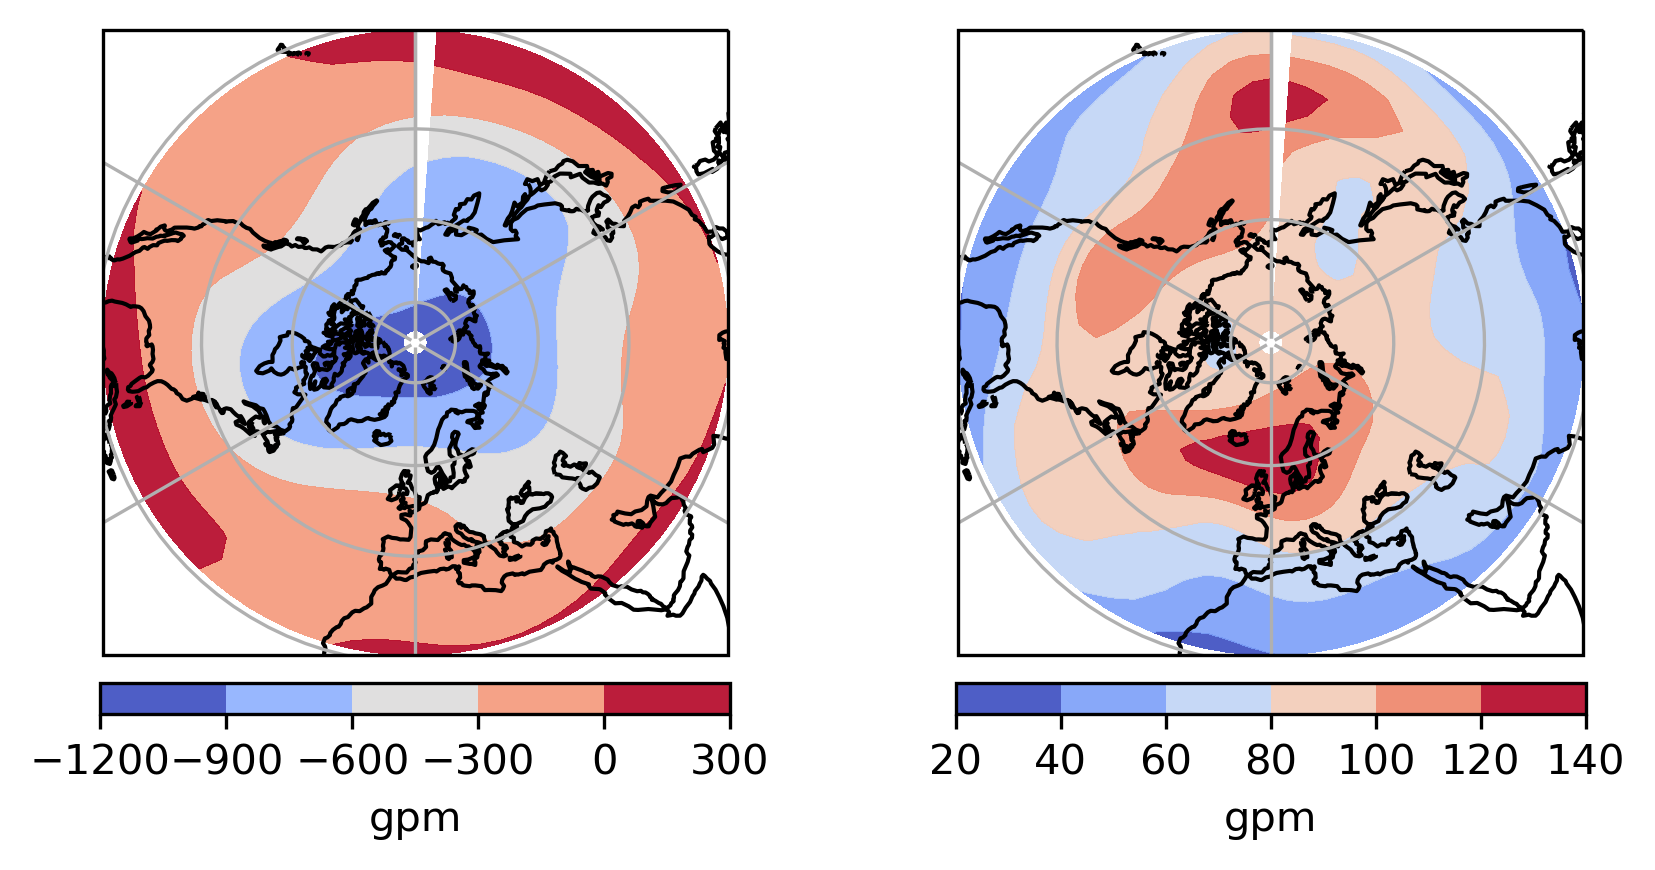

In [62]:
mean_z=xr.open_dataarray(fig_path+"mean_z_MM.nc")
std_z=xr.open_dataarray(fig_path+"std_z_MM.nc")

fig,ax=plt.subplots(figsize=[6,3],ncols=2, subplot_kw={'projection': ccrs.NorthPolarStereo()})
plotpolarview(ax[0],mean_z, np.arange(-1200,400,300),np.arange(-1200,400,300),'gpm')
plotpolarview(ax[1],std_z, np.arange(20,160,20),np.arange(20,160,20),'gpm',)

fig.tight_layout()
fig.savefig("MM_statistics.png")